In [8]:
# 01_data_fetch_and_eda.ipynb

# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

In [2]:
# Load adjusted close prices
adj_close = pd.read_csv('../data/adj_close_prices.csv', index_col=0, parse_dates=True)

In [3]:
# Display basic info
print("Data overview:")
display(adj_close.head())
print(adj_close.describe())

Data overview:


,TSLA,BND,SPY
Date,,,
2015-07-01,17.943333,60.816746,174.917130
2015-07-02,18.667999,60.967072,174.756958
2015-07-06,18.648001,61.177555,174.259628
2015-07-07,17.858667,61.237713,175.355453
2015-07-08,16.997334,61.410595,172.413467


              TSLA          BND          SPY
count  2535.000000  2535.000000  2535.000000
mean    131.963002    68.469189   334.193732
std     120.914904     4.554601   126.427703
min       9.578000    60.779163   155.869781
25%      18.967667    64.654331   230.083199
50%      94.571335    67.604843   305.264435
75%     236.761665    71.891136   420.350494
max     479.859985    77.318245   637.099976


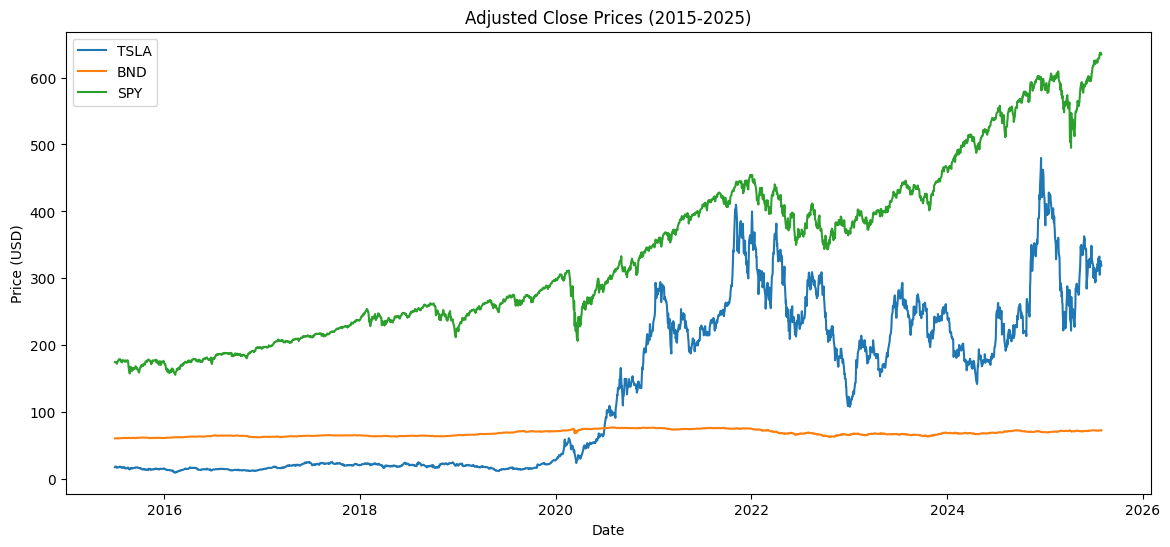

In [6]:
# Plot adjusted close prices over time
plt.figure(figsize=(14, 6))
for col in adj_close.columns:
    plt.plot(adj_close.index, adj_close[col], label=col)
plt.title("Adjusted Close Prices (2015-2025)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.show()

In [4]:
# Calculate daily returns
returns = adj_close.pct_change().dropna()

C:\Users\Admin\AppData\Local\Temp\ipykernel_13044\1823347508.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(returns[col], label=col, shade=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13044\1823347508.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(returns[col], label=col, shade=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_13044\1823347508.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(returns[col], label=col, shade=True)


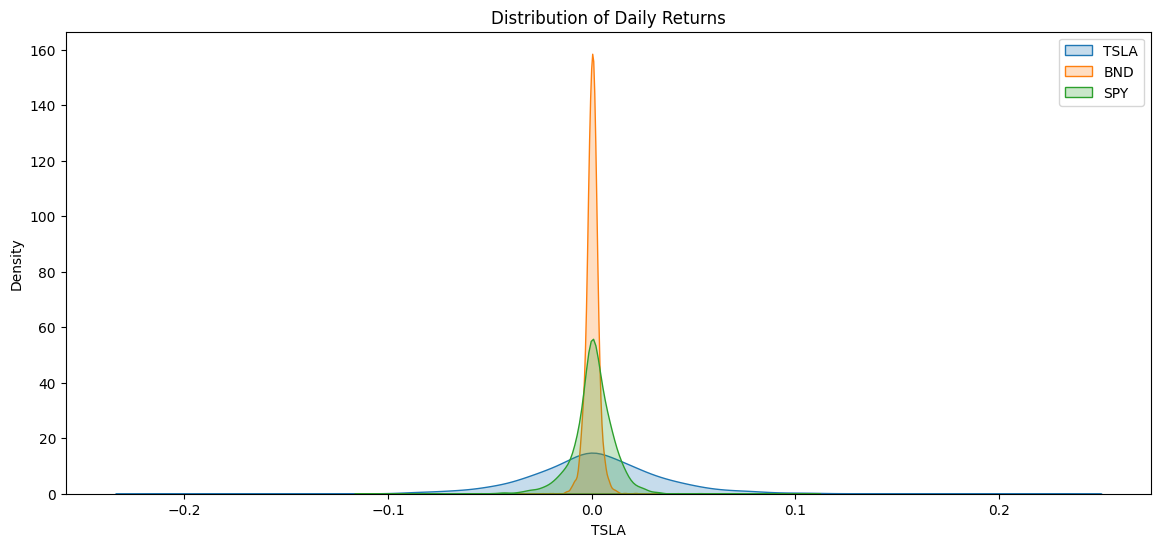

In [8]:
# Plot daily returns
plt.figure(figsize=(14, 6))
for col in returns.columns:
    sns.kdeplot(returns[col], label=col, shade=True)
plt.title("Distribution of Daily Returns")
plt.legend()
plt.show()

In [5]:
# Augmented Dickey-Fuller test for stationarity on TSLA Adj Close
result = adfuller(adj_close['TSLA'])
print(f"ADF Statistic: {result[0]:.4f}")
print(f"p-value: {result[1]:.4f}")
print("Critical Values:")
for key, val in result[4].items():
    print(f"  {key}: {val:.4f}")

if result[1] < 0.05:
    print("TSLA Adj Close is likely stationary.")
else:
    print("TSLA Adj Close is likely non-stationary; consider differencing.")

ADF Statistic: -1.4189
p-value: 0.5732
Critical Values:
  1%: -3.4330
  5%: -2.8627
  10%: -2.5674
TSLA Adj Close is likely non-stationary; consider differencing.


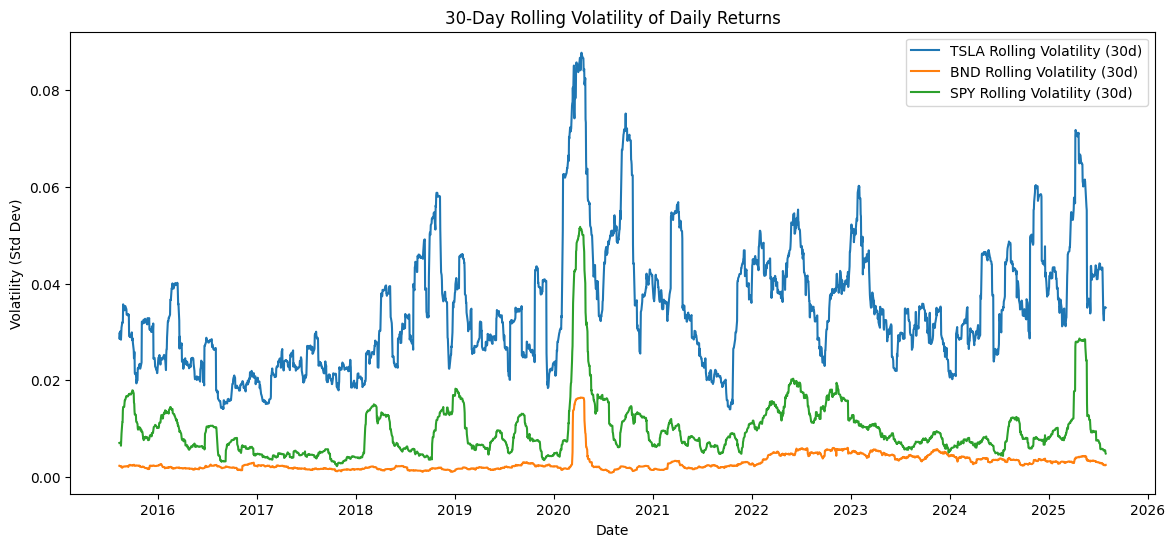

In [6]:
# Calculate rolling volatility (standard deviation) with 30-day window
rolling_vol = returns.rolling(window=30).std()

plt.figure(figsize=(14, 6))
for col in rolling_vol.columns:
    plt.plot(rolling_vol.index, rolling_vol[col], label=f"{col} Rolling Volatility (30d)")
plt.title("30-Day Rolling Volatility of Daily Returns")
plt.xlabel("Date")
plt.ylabel("Volatility (Std Dev)")
plt.legend()
plt.show()

In [11]:
import numpy as np

# Define outliers as returns beyond ±3 standard deviations
outlier_threshold = 3

for asset in returns.columns:
    mean = returns[asset].mean()
    std = returns[asset].std()
    outliers = returns[(returns[asset] > mean + outlier_threshold * std) | (returns[asset] < mean - outlier_threshold * std)]
    
    print(f"\nOutliers for {asset}:")
    display(outliers[[asset]])


Outliers for TSLA:


,TSLA
Date,
2018-08-02,0.161880
2018-09-28,-0.139015
2018-10-01,0.173471
2018-10-23,0.127189
2019-01-18,-0.129711
2019-07-25,-0.136137
2019-10-24,0.176692
2020-02-03,0.198949
2020-02-04,0.137256



Outliers for BND:


,BND
Date,
2020-03-10,-0.013445
2020-03-11,-0.018939
2020-03-12,-0.054385
2020-03-13,0.042201
2020-03-16,0.010511
2020-03-17,-0.020685
2020-03-18,-0.024140
2020-03-20,0.016955
2020-03-23,0.022150



Outliers for SPY:


,SPY
Date,
2015-08-24,-0.042107
2015-08-26,0.038394
2016-06-24,-0.035909
2018-02-05,-0.041823
2018-02-08,-0.037509
2018-12-26,0.050525
2020-02-27,-0.044912
2020-03-02,0.043306
2020-03-04,0.042033


In [9]:
# Annualization factor (trading days)
trading_days = 252

def calculate_var(returns, confidence_level=0.05):
    """
    Historical VaR at the given confidence level
    """
    return returns.quantile(confidence_level)

def calculate_sharpe_ratio(returns, risk_free_rate=0.0):
    """
    Calculate annualized Sharpe ratio.
    """
    excess_returns = returns - risk_free_rate / trading_days
    return (excess_returns.mean() / excess_returns.std()) * np.sqrt(trading_days)

print("\nRisk Metrics:")

for asset in returns.columns:
    var_5pct = calculate_var(returns[asset])
    sharpe = calculate_sharpe_ratio(returns[asset])
    print(f"{asset} - 5% VaR: {var_5pct:.4f}, Sharpe Ratio: {sharpe:.4f}")


Risk Metrics:
TSLA - 5% VaR: -0.0547, Sharpe Ratio: 0.7783
BND - 5% VaR: -0.0049, Sharpe Ratio: 0.3569
SPY - 5% VaR: -0.0172, Sharpe Ratio: 0.7941


In [12]:
# --- Correlation & Covariance Analysis ---

# Calculate correlation matrix for returns
corr_matrix = returns[['TSLA', 'BND', 'SPY']].corr()
print("Correlation Matrix:\n", corr_matrix)

Correlation Matrix:
           TSLA       BND       SPY
TSLA  1.000000  0.057247  0.490442
BND   0.057247  1.000000  0.114844
SPY   0.490442  0.114844  1.000000


In [13]:
# Calculate covariance matrix for returns
cov_matrix = returns[['TSLA', 'BND', 'SPY']].cov()
print("\nCovariance Matrix:\n", cov_matrix)


Covariance Matrix:
           TSLA       BND       SPY
TSLA  0.001390  0.000007  0.000210
BND   0.000007  0.000012  0.000005
SPY   0.000210  0.000005  0.000132


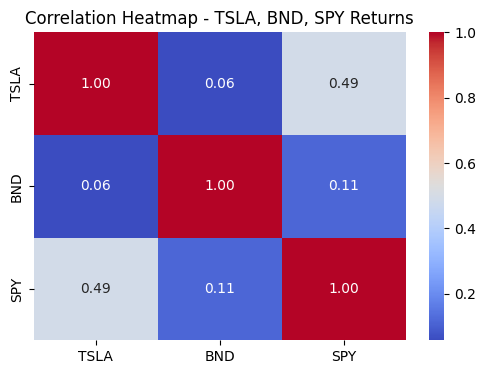

In [14]:
# Plot heatmap of correlations
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap - TSLA, BND, SPY Returns")
plt.show()

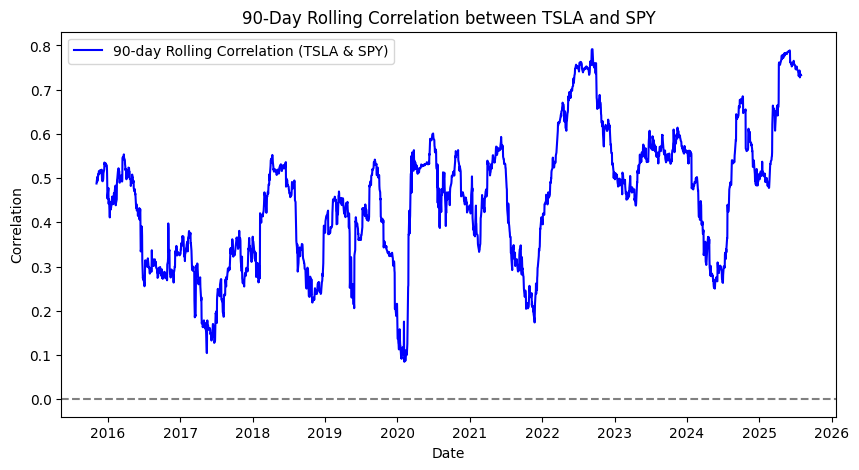

In [15]:
# Rolling correlation (90-day) between TSLA & SPY
rolling_corr = returns['TSLA'].rolling(window=90).corr(returns['SPY'])
plt.figure(figsize=(10, 5))
plt.plot(rolling_corr, label="90-day Rolling Correlation (TSLA & SPY)", color='blue')
plt.axhline(0, linestyle='--', color='gray')
plt.title("90-Day Rolling Correlation between TSLA and SPY")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.legend()
plt.show()

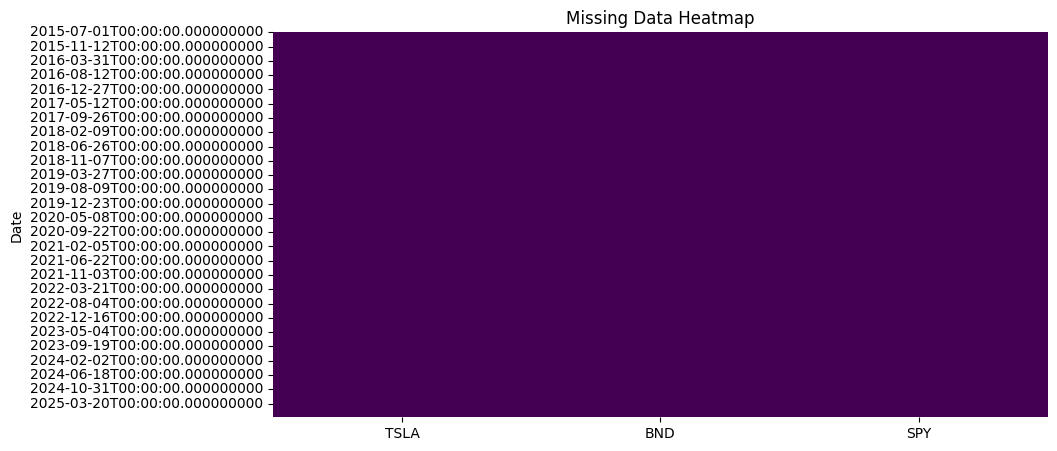

In [17]:
# --- Missing Data Visualization ---

plt.figure(figsize=(10, 5))
sns.heatmap(adj_close.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

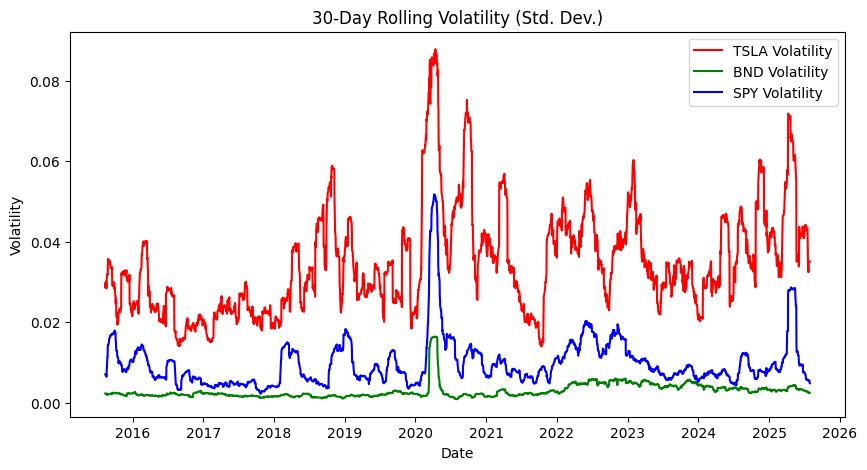

In [18]:
# --- Volatility Clustering ---
# Rolling standard deviation (volatility) for each asset
rolling_vol = returns[['TSLA', 'BND', 'SPY']].rolling(window=30).std()

plt.figure(figsize=(10, 5))
plt.plot(rolling_vol['TSLA'], label="TSLA Volatility", color='red')
plt.plot(rolling_vol['BND'], label="BND Volatility", color='green')
plt.plot(rolling_vol['SPY'], label="SPY Volatility", color='blue')
plt.title("30-Day Rolling Volatility (Std. Dev.)")
plt.xlabel("Date")
plt.ylabel("Volatility")
plt.legend()
plt.show()

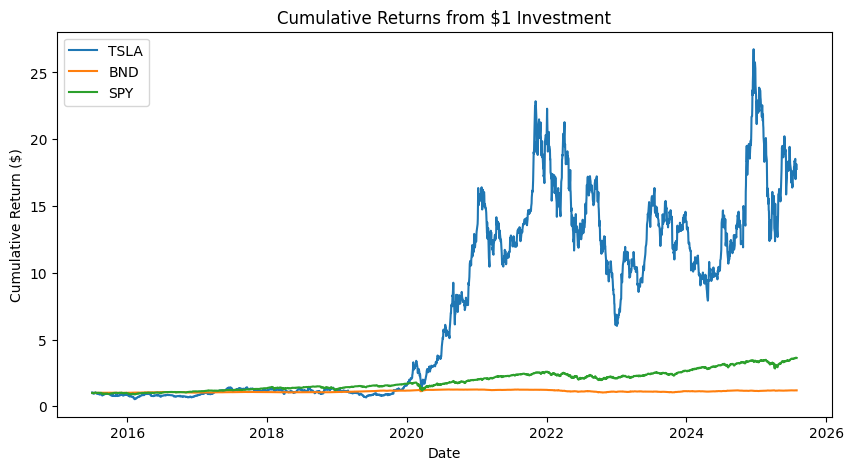

In [19]:
# Calculate cumulative returns
cumulative_returns = (1 + returns[['TSLA', 'BND', 'SPY']]).cumprod()

plt.figure(figsize=(10, 5))
plt.plot(cumulative_returns['TSLA'], label="TSLA")
plt.plot(cumulative_returns['BND'], label="BND")
plt.plot(cumulative_returns['SPY'], label="SPY")
plt.title("Cumulative Returns from $1 Investment")
plt.xlabel("Date")
plt.ylabel("Cumulative Return ($)")
plt.legend()
plt.show()

In [20]:
from statsmodels.tsa.stattools import adfuller

# --- Stationarity Check on Returns ---
def adf_test(series, title=''):
    """
    Perform Augmented Dickey-Fuller test to check stationarity.
    
    Args:
        series (pd.Series): Time series data to test.
        title (str): Name of the series for display.
    """
    print(f"Augmented Dickey-Fuller Test: {title}")
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations']
    out = dict(zip(labels, result[0:4]))
    for key, val in out.items():
        print(f"{key}: {val}")
    for key, val in result[4].items():
        print(f"Critical Value ({key}): {val}")
    if result[1] <= 0.05:
        print("=> Stationary (Reject Null Hypothesis)")
    else:
        print("=> Non-stationary (Fail to Reject Null Hypothesis)")
    print()

# Run ADF test on each asset's returns
adf_test(returns['TSLA'], title='TSLA Returns')
adf_test(returns['BND'], title='BND Returns')
adf_test(returns['SPY'], title='SPY Returns')

Augmented Dickey-Fuller Test: TSLA Returns
ADF Statistic: -34.68109047254198
p-value: 0.0
# Lags Used: 1
# Observations: 2532
Critical Value (1%): -3.4329352851231945
Critical Value (5%): -2.862682171580326
Critical Value (10%): -2.5673780210899224
=> Stationary (Reject Null Hypothesis)

Augmented Dickey-Fuller Test: BND Returns
ADF Statistic: -9.889786539738802
p-value: 3.583341229781433e-17
# Lags Used: 23
# Observations: 2510
Critical Value (1%): -3.4329579682301254
Critical Value (5%): -2.8626921885291017
Critical Value (10%): -2.5673833542324727
=> Stationary (Reject Null Hypothesis)

Augmented Dickey-Fuller Test: SPY Returns
ADF Statistic: -16.264376478217592
p-value: 3.5393893246713734e-29
# Lags Used: 8
# Observations: 2525
Critical Value (1%): -3.4329424595562963
Critical Value (5%): -2.862685339846278
Critical Value (10%): -2.5673797079109892
=> Stationary (Reject Null Hypothesis)



In [ ]:
# Exploratory Data Analysis (EDA) Summary

- The **adjusted close prices** show Tesla’s strong growth with high volatility, while BND remains stable, and SPY shows moderate growth.
- Rolling volatility analysis reveals Tesla’s price is far more volatile than BND and SPY.
- Outlier detection identified days with extreme returns mostly in Tesla, which are important to consider in risk management.
- The Value at Risk (VaR) metric estimates potential losses at a 5% confidence level, with Tesla showing higher risk.
- The Sharpe Ratio indicates risk-adjusted returns, with SPY and BND having more stable, favorable ratios compared to Tesla.
- The Augmented Dickey-Fuller test suggests the adjusted close prices are non-stationary and may require differencing for modeling.
